In [1]:
import os.path as op

In [2]:
import AFQ.data as afd
import nibabel as nib

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#afd.fetch_hcp(['992774', '994273'])

In [4]:
from AFQ import api

In [5]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'HCP_copy')

In [6]:
myafq = api.AFQ(preproc_path=base_dir, sub_prefix='sub', b0_threshold=15, n_seeds=1000, random_seeds=True, bundle_list=["SLF", "ARC", "CST", "FP"])

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [7]:
myafq.bundle_dict

{'SLF_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116c39eb8>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116c42828>,
  'cross_midline': False,
  'uid': 1},
 'SLF_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116c39d30>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116c426a0>,
  'cross_midline': False,
  'uid': 2},
 'ARC_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116c39eb8>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116c4c4a8>,
  'cross_midline': False,
  'uid': 3},
 'ARC_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116c39d30>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116c4c320>,
  'cross_midline': False,
  'uid': 4},
 'CST_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116b9cf60>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116bae588>,
  'cross_midline': False,
  'uid': 5},
 'CST_L': {'ROIs': [<nibabel.nifti1.Nifti1Imag

In [8]:
import time

In [9]:
t1 = time.time()

In [10]:
bb = myafq.bundles

Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/nibabel/streamlines/array_sequence.py:23: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  np.issubdtype(obj.dtype, np.bool)))


Segmenting: SLF_R
Segmenting: SLF_L
Segmenting: ARC_R
Segmenting: ARC_L
Segmenting: CST_R
Segmenting: CST_L
Segmenting: FP


In [11]:
t2 = time.time()

In [12]:
print(t2-t1)

324.70649313926697


In [13]:
import AFQ.viz as afv

In [14]:
import dipy.data as dpd
reg_template = dpd.read_mni_template()

Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


In [15]:
b0 = nib.load(myafq.dti_fa[0]).get_data()

In [16]:
myafq.dwi_affine[0]

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


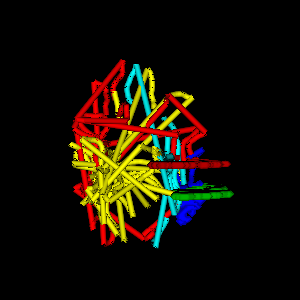

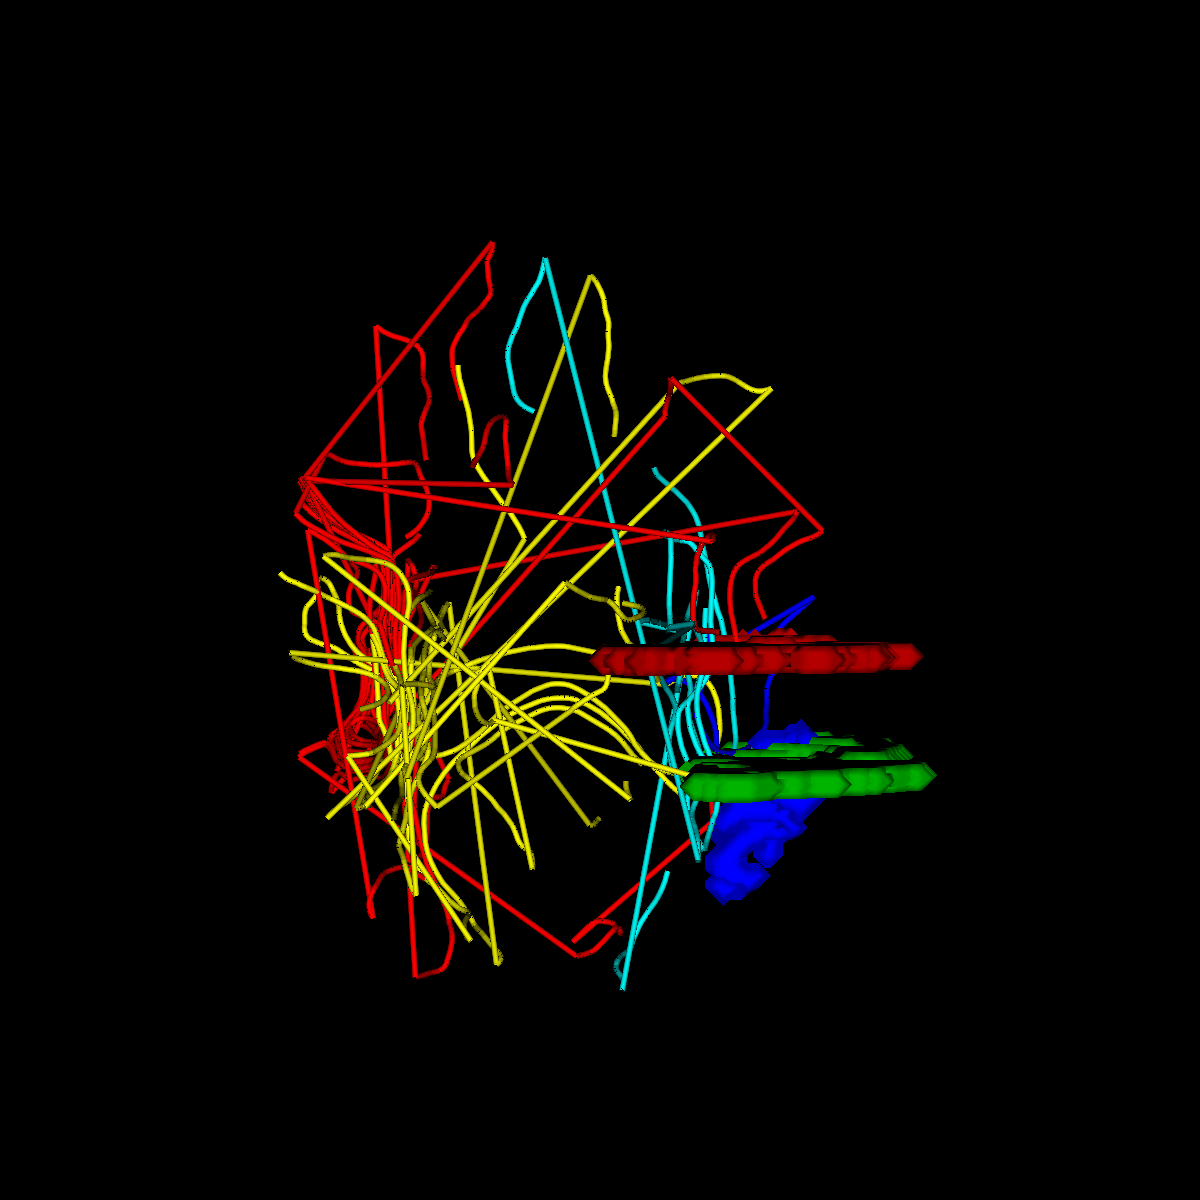

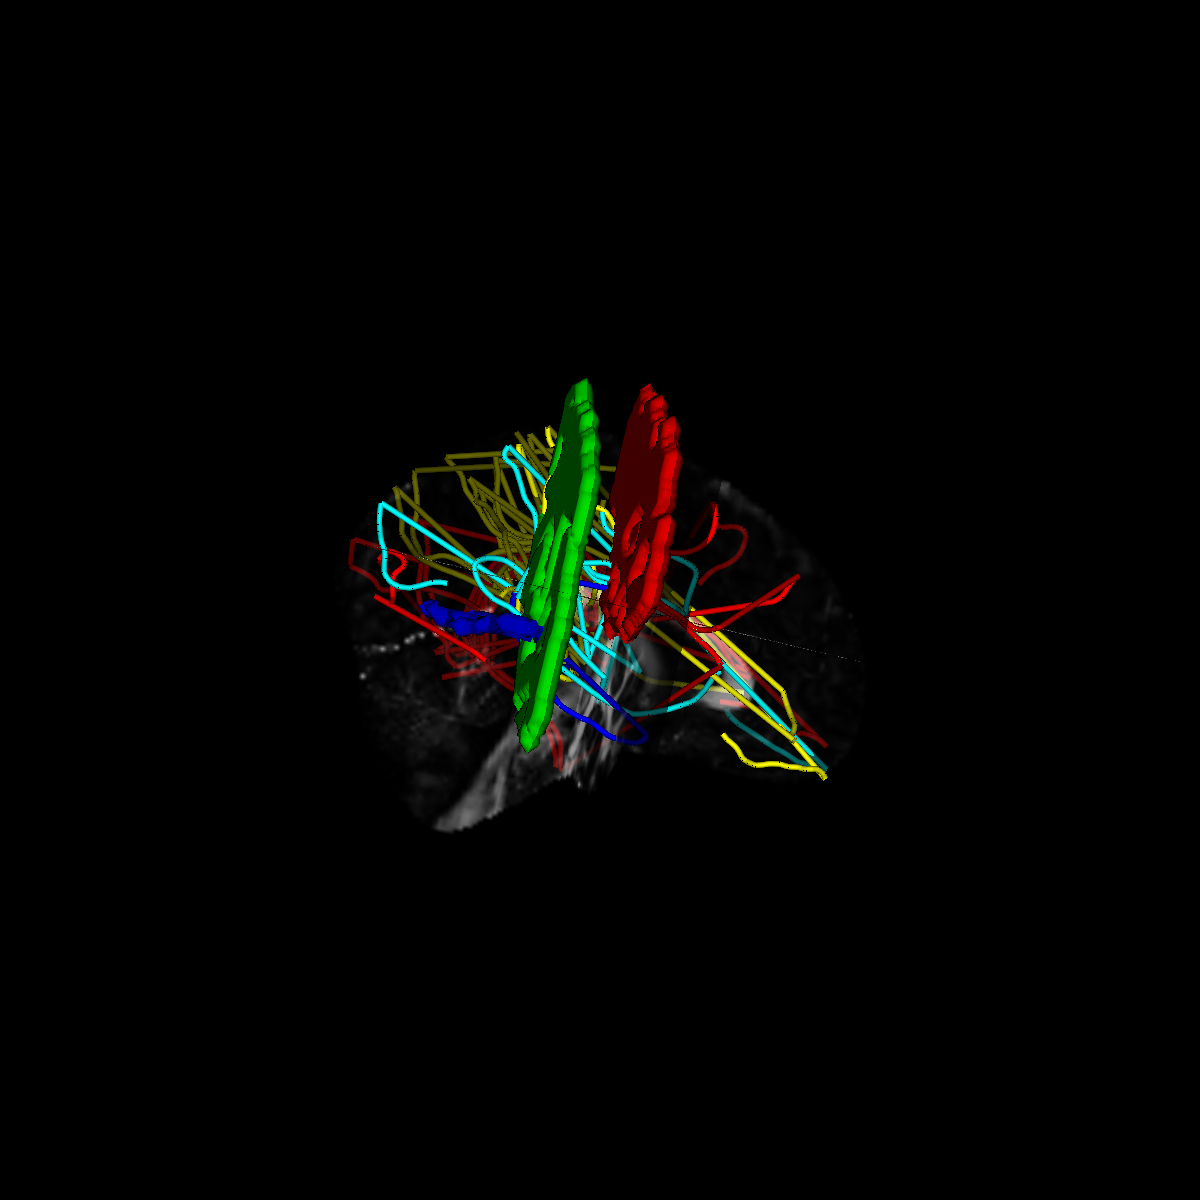

In [17]:
ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['ARC_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['ARC_R']['uid'], interact=False, inline=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['SLF_R']['uid'], interact=False, inline=False, color=(1, 1, 0), ren=ren)
ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False, inline=False, color=(0, 1, 1), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 1, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        interact=False, color=(0, 0, 1), ren=ren)
ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren);

In [18]:
ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['CST_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['CST_R']['uid'], interact=False, inline=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 1, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_R']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 0, 1), ren=ren)

ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren)

ValueError: need at least one array to concatenate

In [ ]:
ren

In [ ]:
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False)
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_R']['uid'], ren=ren, interact=False)
#ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], ren=ren, interact=True);

In [ ]:
debug

In [ ]:
import nibabel as nib 
trk = nib.streamlines.load(myafq.clean_bundles[0])

In [ ]:
trk.header

In [ ]:
trk.streamlines[0]

In [ ]:
len(trk.streamlines)

In [ ]:
import nibabel as nib

In [ ]:
dti_params = nib.load(myafq.dti[0])

In [ ]:
dti_params.affine

In [ ]:
myafq.dwi_affine[0]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(myafq.tract_profiles[0])
plt.plot(df[(df['scalar'] == "dti_fa") & (df['bundle']=="ARC_L")]['profiles'])

In [ ]:
df['bundle'].unique()

In [ ]:
df[df['bundle']=="CST_L"]

In [ ]:
1000/60